In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0,inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df_airline.set_index('Month',inplace=True)

In [12]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

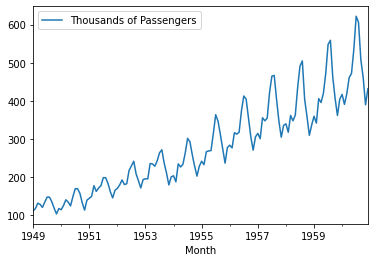

In [13]:
df_airline.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060433
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [18]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [19]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699954
p- value: 0.05421329028382609
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.3842315424685
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [23]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924814
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

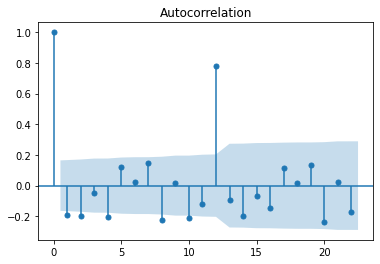

In [25]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

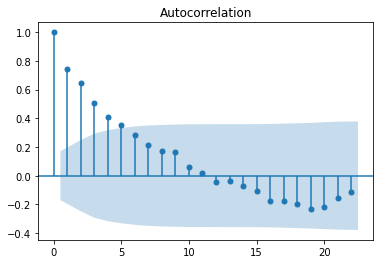

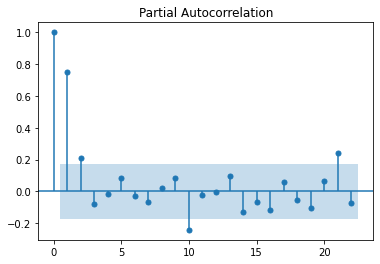

In [26]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


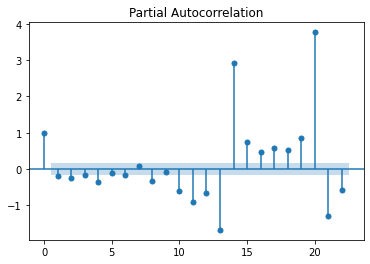

In [27]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

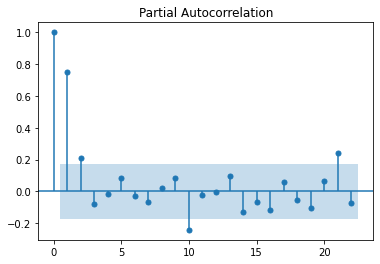

In [28]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [29]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [30]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [31]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [32]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [33]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [34]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [35]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [36]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
model_Arima_fit=model_ARIMA.fit()

In [38]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Fri, 01 Jul 2022   AIC                            775.563
Time:                                15:31:32   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [39]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [40]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [41]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [42]:
pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [43]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

<AxesSubplot:ylabel='Density'>

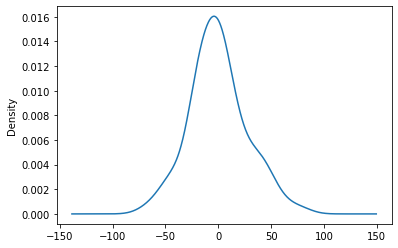

In [44]:
model_Arima_fit.resid.plot(kind='kde')

In [45]:
test_data['Predicted_ARIMA']=pred

C:\Users\siddu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

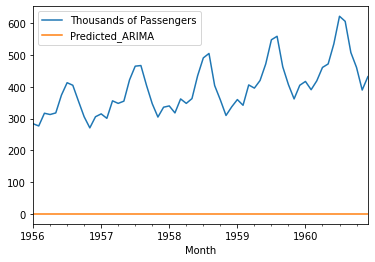

In [46]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

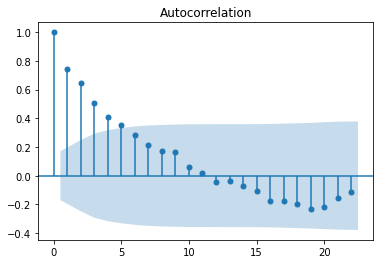

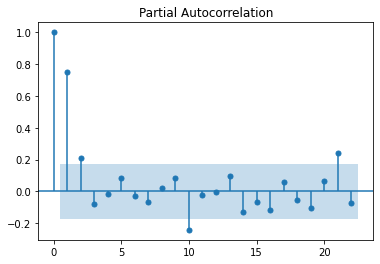

In [47]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [48]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [49]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [50]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 01 Jul 2022   AIC                            548.481
Time:                                     15:31:36   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5975      0.938      0.637      0.524      -1.240       2.435
ar.L2          0.8311      0.232      3.584      0.000       0.377       1.286
ar.L3         -0.4516      0.894     -0.505      0.613      -2.203       1.300
ma.L1          0.1846      1.166      0.158      0.874      -2.101       2.470
ma.L2         -0.5334      1.264     -0.422      0.673      -3.010       1.944
ma.L3         -0.0988      0.385     -0.257      0.797      -0.853       0.656
ma.L4         -0.1274      0.339     -0.376      0.707      -0.791       0.536
ma.L5          0.2470      0.357      0.691      0.489      -0.453       0.947
sigma2        87.7361     81.453      1.077      0.281     -71.909     247.381
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.426829
1960-09-01,508.0,-98.0,-82.0,45.0,0.426829
1960-10-01,461.0,-47.0,51.0,54.0,0.426829
1960-11-01,390.0,-71.0,-24.0,28.0,0.426829
1960-12-01,432.0,42.0,113.0,27.0,0.426829


In [53]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [54]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

C:\Users\siddu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

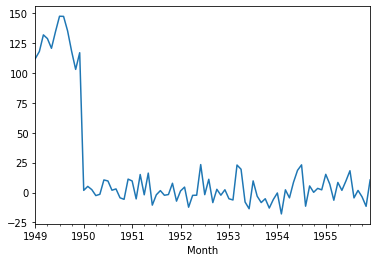

In [55]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

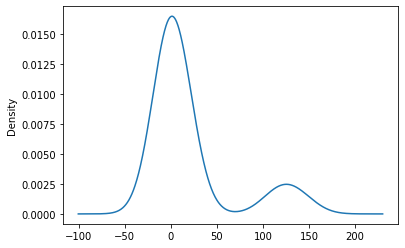

In [56]:
model_SARIMA_fit.resid.plot(kind='kde')

In [57]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\siddu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829,NaN
1956-03-01,317.0,40.0,47.0,50.0,0.426829,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829,NaN
1956-05-01,318.0,5.0,9.0,48.0,0.426829,NaN
1956-06-01,374.0,56.0,51.0,59.0,0.426829,NaN
1956-07-01,413.0,39.0,-17.0,49.0,0.426829,403.400328
1956-08-01,405.0,-8.0,-47.0,58.0,0.426829,385.073477
1956-09-01,355.0,-50.0,-42.0,43.0,0.426829,349.449083


<AxesSubplot:xlabel='Month'>

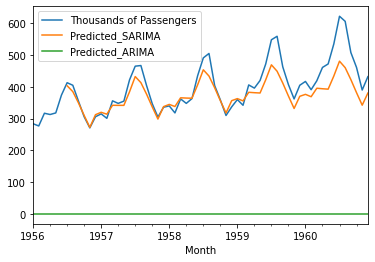

In [59]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()